# El tratamiento de las Variables categóricas

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../python-ml-course-master/datasets/ecom-expense/Ecom Expense.csv')
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [3]:
# Se deben crear variables dummies de las var. categoricas para el modelo
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City")

In [6]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [21]:
# Agregar tablas dummies al DataFrame
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [22]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()

In [23]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [39]:
features_cols = ["Monthly Income", "Transaction Time",
                 "Gender_Female", "Gender_Male",
                 "City_Tier 1", "City_Tier 2", "City_Tier 3", "Record"]
x = df_new[features_cols]
y = df_new["Total Spend"]

In [40]:
ln = LinearRegression()
ln.fit(x, y)

LinearRegression()

In [41]:
print(ln.intercept_)
print(ln.coef_)

-79.41713030136998
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [42]:
# Cada columna con su coeficiente
list(zip(features_cols, ln.coef_))

[('Monthly Income', 0.14753898049205733),
 ('Transaction Time', 0.15494612549589526),
 ('Gender_Female', -131.0250132555463),
 ('Gender_Male', 131.02501325554644),
 ('City_Tier 1', 76.7643260104954),
 ('City_Tier 2', 55.13897430923241),
 ('City_Tier 3', -131.90330031972783),
 ('Record', 772.2334457445643)]

In [43]:
# R² ajustado
ln.score(x, y)

0.9179923586131016

Para mejorar el modelo, se deben agregar nuevas variables al modelo.
* R² ajustado: **0.19478** para modelo con 7 variables
* R² ajustado: **0.91799** para modelo con 8 variables
* R² ajustado: **0.91874** para modelo con 9 variables (no varia demasiado)

El modelo puede ser escrito como:
* Total_Spend = -79.41713030136998 + 'Monthly Income'* 0.14753898049205733 + 'Transaction Time'* 0.15494612549589526 +'Gender_Female'*  -131.0250132555463 + 'Gender_Male'* 131.02501325554644 +'City_Tier 1'* 76.7643260104954 + 'City_Tier 2'* 55.13897430923241 + 'City_Tier 3'* -131.90330031972783 + 'Record'* 772.2334457445643
    * Si es hombre y vive en CT1: Total_Spend = 128.37220896466724 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Record'* 772.2334457445648
    * Si es hombre y vive en CT2: Total_Spend = 106.74685726340445 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 +'Record'* 772.2334457445648
    * Si es hombre y vive en CT3: Total_Spend = -80.29541736555583 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Record'* 772.2334457445648
    * Si es mujer y vive en CT1: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 76.76432601049527 +'Record'* 772.2334457445648
    * Si es mujer y vive en CT2: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 55.138974309232474  +'Record'* 772.2334457445648
    * Si es mujer y vive en CT3: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456-131.9033003197278 +'Record'* 772.2334457445648

In [46]:
df_new["Prediction"] = (-79.41713030136998) + df_new['Monthly Income'] * 0.14753898049205733 + \
    df_new['Transaction Time'] * 0.15494612549589526 + df_new['Gender_Female'] * (-131.0250132555463) + \
    df_new['Gender_Male'] * 131.02501325554644 + df_new['City_Tier 1'] * 76.7643260104954 + df_new['City_Tier 2'] * 55.13897430923241 + \
    df_new['City_Tier 3'] * (-131.90330031972783) + df_new['Record'] * 772.2334457445643

In [55]:
# Otra forma de hacer el calculo de las predicciones
# df_new["Prediction"] = ln.predict(pd.DataFrame(df_new[features_cols]))

In [47]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,Prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [49]:
SSD = np.sum((df_new["Prediction"] - df_new["Total Spend"])**2)
SSD

1517733985.340817

In [50]:
# Desviacion estandar
RSE = np.sqrt(SSD/(len(df_new) - len(features_cols) - 1))
RSE

803.1318809818166

In [51]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976714

In [54]:
# Porcentaje de error
error = RSE/sales_mean
error*100

13.031135680294161

*CONCLUSION:* Se gasta 6163.18 EUR con una desviación de 803.13 EUR

## Eliminar variables dummy redundantes

In [65]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:, 1:]
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:, 1:]

In [66]:
column_names = df.columns.values.tolist()

In [67]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()

df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [69]:
features_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]
x = df_new[features_cols]
y = df_new["Total Spend"]
ln = LinearRegression()
ln.fit(x, y)

LinearRegression()

In [70]:
print(ln.intercept_)
list(zip(features_cols, ln.coef_))

-133.67781754642147


[('Monthly Income', 0.14753898049205735),
 ('Transaction Time', 0.15494612549589615),
 ('Gender_Male', 262.05002651109413),
 ('City_Tier 2', -21.625351701262694),
 ('City_Tier 3', -208.667626330223),
 ('Record', 772.233445744564)]

In [71]:
# R² ajustado
ln.score(x, y)

0.9179923586131016

Coeficientes con todas las variables en el modelo
* [('Monthly Income', 0.14753898049205733),
*  ('Transaction Time', 0.15494612549589526),
*  ('Gender_Female', -131.0250132555463),
*  ('Gender_Male', 131.02501325554644),
*  ('City_Tier 1', 76.7643260104954),
*  ('City_Tier 2', 55.13897430923241),
*  ('City_Tier 3', -131.90330031972783),
*  ('Record', 772.2334457445643)]

Coeficientes tras enmascarar las variables dummies
* [('Monthly Income', 0.14753898049205735),
*  ('Transaction Time', 0.15494612549589615),
*  ('Gender_Male', 262.05002651109413),
*  ('City_Tier 2', -21.625351701262694),
*  ('City_Tier 3', -208.667626330223),
*  ('Record', 772.233445744564)]

Los cambios se reflejan en:
* Gender_Male -> Antes: 131.02  Despues: 262.05 = (131.02 - (-131.02))
* Gender_Female -> Antes: -131.02  Despues: 0
* City_Tier 1 -> Antes: 76.76  Despues: 0
* City_Tier 2 -> Antes: 55.13  Despues: -21.62 = (55.13 - 76.76)
* City_Tier 3 -> Antes: -131.90  Despues: -208.66 = (-131.90 - 76.76)

# Transformación de variables para conseguir una relación no lineal

In [72]:
data_auto = pd.read_csv('python-ml-course-master/datasets/auto/auto-mpg.csv')
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [73]:
data_auto.shape

(406, 9)

Text(0.5, 1.0, 'Caballos de potencia vs Millas por galeón')

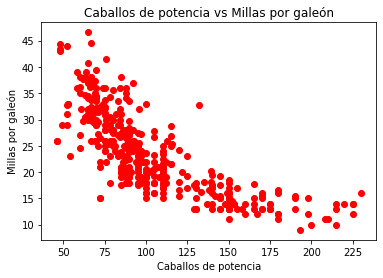

In [77]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()

plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de potencia")
plt.ylabel("Millas por galeón")
plt.title("Caballos de potencia vs Millas por galeón")

## Modelo de regresión lineal
* mpg = a + b * horsepower

In [87]:
x = data_auto["horsepower"].fillna(data_auto["horsepower"].mean()).to_numpy()
y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
x_data = x[:,np.newaxis]  # para transformar X en matriz

In [85]:
ln = LinearRegression()
ln.fit(x_data, y)

LinearRegression()

Text(0.5, 1.0, 'Caballos de potencia vs Millas por galeón')

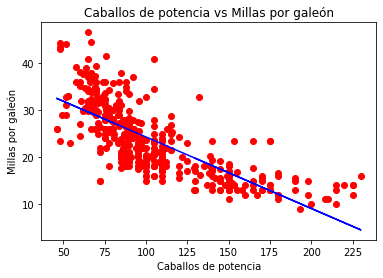

In [86]:
%matplotlib inline
plt.plot(x, y, "ro")
plt.plot(x, ln.predict(x_data), color="blue")
plt.xlabel("Caballos de potencia")
plt.ylabel("Millas por galeón")
plt.title("Caballos de potencia vs Millas por galeón")

In [90]:
ln.score(x_data, y)

0.574653340645025

In [94]:
SSD = np.sum((y - ln.predict(x_data))**2)
RSE = np.sqrt(SSD/(len(x_data) - 1))
y_mean = np.mean(y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(10315.75196006092, 5.046879480825511, 23.51457286432162, 21.46277336163346)

*CONCLUSION:* Promedio de 10315.75 galones con una desviación de 5.04 galones, 23.52 mpg y 21% de error

## Modelo de regresión cuadrático
* mpg = a + b * horsepower²

In [95]:
x_data = x**2
x_data = x_data[:,np.newaxis]

In [96]:
ln = LinearRegression()
ln.fit(x_data, y)

LinearRegression()

In [98]:
ln.score(x_data, y)

0.4849887034823205

In [99]:
SSD = np.sum((y - ln.predict(x_data))**2)
RSE = np.sqrt(SSD/(len(x_data) - 1))
y_mean = np.mean(y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.51457286432162, 23.6168898529981)

*CONCLUSION:* Promedio de 12490.35 galones con una desviación de 5.55 galones, 23.52 mpg y 23.6% de error

## Modelo de regresión lineal y cuadrático
* mpg = a + b * horsepower + c * horsepower²

In [100]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [101]:
poly = PolynomialFeatures(degree=2)

In [102]:
x_data = poly.fit_transform(x[:,np.newaxis])

In [103]:
lm = linear_model.LinearRegression()
lm.fit(x_data, y)

LinearRegression()

In [105]:
lm.score(x_data, y)

0.6439066584257469

In [106]:
lm.intercept_

55.026192447081144

In [107]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026 + (-0.434) * hp + 0.0011 * hp²

In [120]:
def regresion_validation(x_data, y, y_pred):
    SSD = np.sum((y - y_pred)**2)
    RSE = np.sqrt(SSD/(len(x_data)-1))
    y_mean = np.mean(y)
    error = RSE/y_mean
    print(f"SSD: {str(SSD)}, RSE: {str(RSE)}, Y_mean: {str(y_mean)}, error: {str(error*100)} %")

In [122]:
for d in range(2,12):
    poly = PolynomialFeatures(degree=d)
    x_data = poly.fit_transform(x[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(x_data, y)
    print(f"Regresión de grado {str(d)}")
    print(f"R²: {str(lm.score(x_data, y))}")
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(x_data, y, lm.predict(x_data))

Regresión de grado 2
R²: 0.6439066584257469
55.026192447081144
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502, RSE: 4.61778115803654, Y_mean: 23.51457286432162, error: 19.63795466190689 %
Regresión de grado 3
R²: 0.6444678885560744
58.44877411167218
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.56936742855, RSE: 4.614140736300908, Y_mean: 23.51457286432162, error: 19.622473106036676 %
Regresión de grado 4
R²: 0.6467674189704502
40.096643855924114
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD: 8566.799832491351, RSE: 4.599194731579757, Y_mean: 23.51457286432162, error: 19.558912501268775 %
Regresión de grado 5
R²: 0.6547512491808845
-40.69399208430757
[ 0.00000000e+00  4.00021895e+00 -7.54802470e-02  6.19621643e-04
 -2.36220985e-06  3.41983064e-09]
SSD: 8373.171387714156, RSE: 4.5469217338343535, Y_mean: 23.51457286432162, error: 19.33661206635543 %
Regresión de grado 6
R²: 0.6572194304727679
-156.98286